<a href="https://colab.research.google.com/github/Mudit-Mehta/Computer-Vision-AI-Riverbank-monitoring/blob/main/Computervision_AI_Flood_risk_detectors_8_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Width at x=0: 84.31 meters
Width at x=72: 83.93 meters
Width at x=208: 92.82 meters
The number of Contours are: 18
The average width of the river is: 87.02054794520548 meters


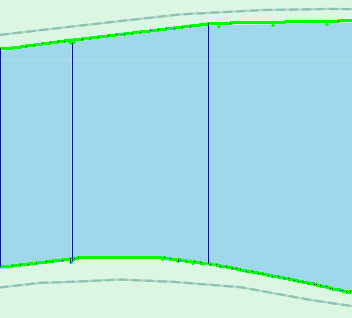

Image loaded successfully.


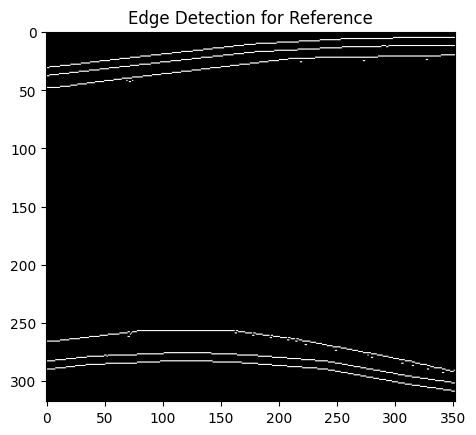

River width at the selected part: 219 pixels
River width: 87.02 meters


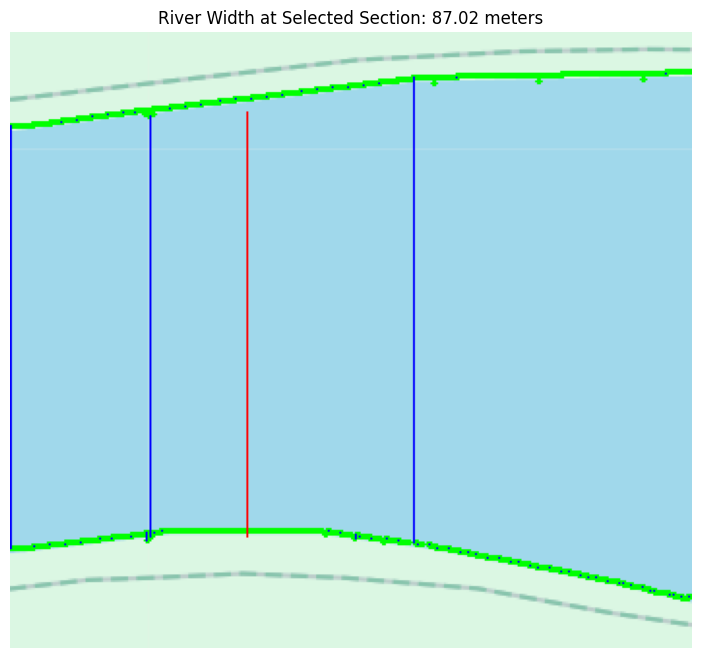

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math


# Coordinates for image on Google Maps: 47.217416, 7.562441
# Load the image
image = cv2.imread("/content/GM_RA_8.5.png")

# Pre-Processing

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale


blurred = cv2.GaussianBlur(gray, (7, 7), 100 ) # Apply GaussianBlur to reduce noise


# Perform edge detection using Canny
edges = cv2.Canny(blurred, 20, 30)

plt.imshow(edges, cmap='gray')

# Find contours of the edges (riverbanks)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours based on the length (to find the longest contours which should be riverbanks)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[12:30]# Assuming two largest contours are the banks

# Draw contours on the original image (for visualization)
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

top = (122, 41)   # Replace with actual pixel coordinates of the top edge of the river
bottom = (122,260)  # Replace with actual pixel coordinates of the bottom edge of the river

# Get pixel-to-meter ratio (you should update the pixel length of the scale bar)
scale_length_in_pixels = ((top[0]-bottom[0])**2 + (top[1]-bottom[1])**2)**0.5
# Replace this with the actual measurement of the scale bar in pixels
actual_scale_length_in_meters = 84.7  # Length in meters as given in the image

# Calculate the pixel-to-meter ratio
pixel_to_meter_ratio = actual_scale_length_in_meters / scale_length_in_pixels


list1 = []
# Loop through and draw vertical lines to measure width at multiple points
for x in range(0, image.shape[1], 2):  # Define intervals along the width of the river
    # Extract y coordinates of river banks at this x position
    bank_1_y = None
    bank_2_y = None
    for contour in contours:
        for point in contour:
            px, py = point[0]
            if px == x:
              if abs(px - x) < 3:  # Close to the vertical line
                    if bank_1_y is None:
                        bank_1_y = py
                    elif bank_2_y is None:
                        bank_2_y = py

    # If both banks found, calculate the width
    if bank_1_y is not None and bank_2_y is not None:
        width = abs(bank_1_y - bank_2_y)
        if width * pixel_to_meter_ratio > 80:
          print(f'Width at x={x}: {width*pixel_to_meter_ratio:.2f} meters')
          list1.append(width * pixel_to_meter_ratio)
        # Draw the width line on the image
        cv2.line(image, (x, bank_1_y), (x, bank_2_y), (255, 0, 0), 1)
avg = sum(list1)/len(list1)
#avg = 87.02
print("The number of Contours are: " + str(len(contours)))
print("The average width of the river is: " + str(avg) + " meters")

# Show the image with detected banks and widths
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    print("Image loaded successfully.")

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (7, 7), 100)
# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Display edge-detected image to manually pick coordinates (for understanding)

plt.title("Edge Detection for Reference")
plt.show()


# Input the coordinates for the top and bottom of the river at the section you want to measure
# For example: top = (x1, y1), bottom = (x2, y2)

# Calculate the vertical pixel distance between the two coordinates
river_width_in_pixels = abs(top[1] - bottom[1])

# Convert the width to meters using the pixel-to-meter ratio
river_width_in_meters = river_width_in_pixels * pixel_to_meter_ratio

print(f"River width at the selected part: {river_width_in_pixels} pixels")
print(f"River width: {avg:.2f} meters")

# Draw the selected points and line on the original image
image_with_line = image.copy()
cv2.line(image_with_line, top, bottom, (0, 0, 255), 1)  # Red line for the selected width

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title(f"River Width at Selected Section: {avg:.2f} meters")
plt.axis('off')
plt.show()


Image loaded successfully.
Number of contours detected: 8
219.0
2.5855962219598583
The centerline is at 150.5
Pixel shift for 5 meters: -3.8783943329397874
Pixel shift for 10 meters: -12.92798110979929
The number of contours are 4


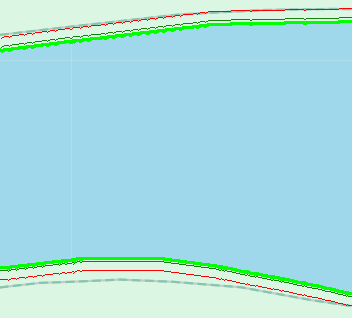

The average 87.02
The ideal maintenance line, represented by the dark green contour, should be 3 meters from the river edge
The ideal bank line, represented by the red contour, should be 5 meters from the river edge


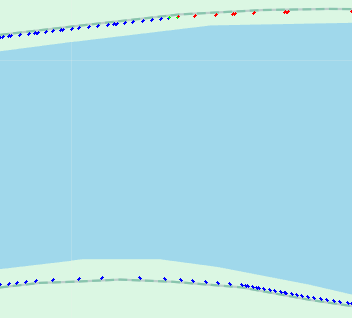

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/GM_RA_8.5.png")

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    print("Image loaded successfully.")

# Step 1: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 50)

# Step 3: Perform edge detection using Canny
edges = cv2.Canny(blurred, 5, 50)

# Find contours of the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Let's print the number of contours and confirm contour 4 exists
print(f"Number of contours detected: {len(contours)}")

'''
def merge_contours(contour1, contour2):
  for i in range(len(contours)):
    return numpy.concatenate((contour1, contours[i]), axis=0)
'''
# Contour Detection
contours = sorted(contours, key=cv2.contourArea, reverse=True)[4:]

cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

avg = 87.02

# Make sure contour 4 exists
if len(contours) > 0:
    # Step 5: Calculate the pixel-to-meter ratio (you should adjust this based on your actual scale)
    top = (122, 41)   # Replace with actual pixel coordinates of the top edge of the river
    bottom = (122,260)  # Replace with actual pixel coordinates of the bottom edge of the river

    pixel_length = (top[0] - bottom[0])
    scale_length_in_pixels = ((top[0] - bottom[0]) ** 2 + (top[1] - bottom[1]) ** 2) ** 0.5
    w =  scale_length_in_pixels
    print(scale_length_in_pixels)
    actual_scale_length_in_meters = 84.7  # Replace with your known length in meters
    pixel_to_meter_ratio = scale_length_in_pixels/actual_scale_length_in_meters
    print(pixel_to_meter_ratio)


    mid_point = (bottom[1] + top[1])/2
    print("The centerline is at " + str(mid_point))

    # Calculate the pixel shift equivalent to 5 meters
    meters_above = -1.5
    pixel_shift_Min = meters_above * pixel_to_meter_ratio
    print(f"Pixel shift for 5 meters: {pixel_shift_Min}")  # Debug info
    # Calculate the pixel shift equivalent to 15 m

    if avg >= 15:
      meters_above = - 5
      pixel_shift_bank = meters_above * pixel_to_meter_ratio
      print(f"Pixel shift for 10 meters: {pixel_shift_bank}")

    print("The number of contours are " + str(len(contours)))
    for i in range(len(contours)):
      # Step 4: Extract contour 4
      contour = contours[i]
      # Step 6: Create a shifted version of contour 4 (shift upwards by 5 meters)
      shifted_contour_4_points = []
      shifted_contour_bank_line = []
      for point in contour:
          x, y = point[0]
          if y > mid_point:
            new_y = int(y - pixel_shift_Min)  # Shift upward by 5 meters
            shifted_contour_4_points.append((x, new_y))
            bank_y = int(y - pixel_shift_bank)
            shifted_contour_bank_line.append((x, bank_y))
          elif y < mid_point:
            new_y = int(y + pixel_shift_Min)  # Shift downward by 5 meters
            shifted_contour_4_points.append((x, new_y))
            bank_y = int(y + pixel_shift_bank)
            shifted_contour_bank_line.append((x, bank_y))
      # Step 7: Draw the original contour 4 (green) and shifted contour (red)
      image_with_lines = image

      # Convert the shifted points into a numpy array for drawing
      shifted_contour_4_points = np.array(shifted_contour_4_points, dtype=np.int32)
      shifted_contour_bank_line = np.array(shifted_contour_bank_line, dtype=np.int32)
      # Draw original contour 4 in green
      cv2.polylines(image_with_lines, [contour], isClosed=False, color=(0, 255, 0), thickness=2)
      # Draw the shifted contour 4 in red
      cv2.polylines(image_with_lines, [shifted_contour_4_points], isClosed=False, color=(7, 130, 19), thickness=1)
      cv2.polylines(image_with_lines, [shifted_contour_bank_line], isClosed=False, color=(0, 0, 255), thickness=1)
      # Step 8: Show the image with the green and red lines


    cv2_imshow(image_with_lines)
    print("The average " + str(avg))
    print("The ideal maintenance line, represented by the dark green contour, should be 3 meters from the river edge")
    print("The ideal bank line, represented by the red contour, should be 5 meters from the river edge")


    # Step 9: Wait for keypress before closing
else:
  print("Contour 4 does not exist.")


'''
Bank Highlighting: Final Step
'''
# Contour Scrutinization
# Sort the contours based on the length (to find the longest contours which should be riverbanks)
contours = sorted(contours, key=cv2.contourArea, reverse=True) # Assuming two largest contours are the banks

# Find contours of the edges (riverbanks)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw and number each contour
'''
for i, contour in enumerate(contours):
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Green for contours

    # Compute centroid to place the number
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Avoid division by zero
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:  # If centroid is unreliable, use the first contour point
        cX, cY = contour[0][0]

    # Put text label near each contour
    cv2.putText(image, str(i), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  # White numbers
'''


contours_bank_edge = sorted(contours, key=cv2.contourArea, reverse=True)[:2]
contours_bank_edge = [np.array(contour, dtype=np.int32) for contour in contours_bank_edge]
image_Bank = cv2.imread("/content/GM_RA_8.5.png")
for contour in contours_bank_edge:
  for point in contour:
    px, py = point[0]

    #Top Contour
    if py < mid_point:
      # For Loop
      if py > new_y:
        image_Bank = cv2.circle(image_Bank,(px,py), radius = 1, color = (255,0,0), thickness = -1)
      elif py < new_y:
        image_Bank = cv2.circle(image_Bank,(px,py), radius = 1, color = (0,0,255), thickness = -1)
      else:
        image_Bank = cv2.circle(image_Bank,(px,py), radius = 1, color = (0, 255, 0), thickness = -1)

      #Bottom Contour
    if py > mid_point:
      if py > int(y + pixel_shift_bank):
        image_Bank = cv2.circle(image_Bank,(px,py), radius = 1, color = (255,0,0), thickness = -1)
      elif py < int(y + pixel_shift_bank):
        image_Bank = cv2.circle(image_Bank,(px,py), radius = 1, color = (0,0,255), thickness = -1)
      else:
        image_Bank = cv2.circle(image_Bank,(px,py), radius = 1, color = (0, 255, 0), thickness = -1)
cv2_imshow(image_Bank)